In [1]:
import json
import pandas as pd
import datetime
import dateutil.parser
import math

import re
import numpy as np
import matplotlib.pyplot as plt

from nltk.corpus import stopwords


In [2]:
#load file

# file_name = r"/Users/christianwanser/Desktop/DVA Project/messages.json"
file_name = r"messages.json"
data = open(file_name, encoding='utf-8-sig')
json_data = json.load(data)
df_messages = pd.DataFrame(json_data)

df_messages

df_messages_messages = df_messages["Message"]

df_messages_messages_lower = [x.lower() for x in df_messages_messages]

df_messages["Message"] = df_messages_messages_lower

df_messages



,_id,Vod_id,Timestamp,Content_offset_seconds,Bin,Username,User_id,Message,Emoticons,Sentiment,Sentiment_Rolling_Avg
0,{'$oid': '60753504eba91940743ba095'},881706761,1611191823434,138.734,2,tylerannne,543936380,aksell aksell aksell aksell aksell aksell,"[{'_id': '302309330', 'begin': 0, 'end': 5, 'u...",1.0,0.138889
1,{'$oid': '60753504eba91940743ba084'},881706761,1611191819240,134.540,2,madsmorls,624256672,quackypolo quackypolo quackypolo quackypolo,"[{'_id': '305458587', 'begin': 0, 'end': 9, 'u...",0.0,0.227273
2,{'$oid': '60753504eba91940743ba091'},881706761,1611191823174,138.474,2,kylee_salesky,583929533,quackyroblox quackyroblox quackyroblox quackyr...,"[{'_id': '305458707', 'begin': 0, 'end': 11, '...",0.0,0.125000
3,{'$oid': '60753504eba91940743ba0b5'},881706761,1611191829171,144.471,2,mink0e,600676167,eretlbi eretlbi eretlbi eretlbi eretlbi eretlb...,"[{'_id': '303703164', 'begin': 0, 'end': 6, 'u...",0.0,0.176471
4,{'$oid': '60753504eba91940743ba0cb'},881706761,1611191831178,146.478,2,Esteban0317,192103391,quackyroblox quackyroblox quackyroblox quackyr...,"[{'_id': '305458707', 'begin': 0, 'end': 11, '...",0.0,0.202247
...,...,...,...,...,...,...,...,...,...,...,...
5052,{'$oid': '60753506eba91940743bb3ef'},881706761,1611198099791,6415.091,106,teddy_sam,618873051,gnfpride1 gnfpride1 gnfpride1 gnfpride1 gnfpri...,"[{'_id': '304015553', 'begin': 0, 'end': 8, 'u...",0.0,0.162791
5053,{'$oid': '60753506eba91940743bb40c'},881706761,1611198164560,6479.860,107,teddy_sam,618873051,gnfraid gnfraid gnfraid gnfraid gnfraid gnfrai...,"[{'_id': '303516745', 'begin': 0, 'end': 6, 'u...",0.0,0.107143
5054,{'$oid': '60753506eba91940743bb415'},881706761,1611198194800,6510.100,108,BakedCupcake,76818579,koncha <3,"[{'_id': '160400', 'begin': 0, 'end': 5, 'url'...",0.0,0.166667
5055,{'$oid': '60753506eba91940743bb423'},881706761,1611198232366,6547.666,109,teddy_sam,618873051,pogchamp,[],0.0,0.200000


In [3]:

# Extract Emoticons

message_list = [x for x in df_messages["Message"]]
# new_message_list = []

emoticon_list = [x for x in df_messages["Emoticons"]]
emoticon_list

emoticons_per_message = []

for i in range(0,len(emoticon_list)):
    emoticon_select_list = emoticon_list[i]
    if emoticon_select_list != None:
        emoticon_this_message = []
        for j in range(0,len(emoticon_select_list)):
#             print(i,j,emoticon_select_list[j])
            begin = emoticon_select_list[j]["begin"]
            end = emoticon_select_list[j]["end"]
            emoticon = message_list[i][begin:end+1]
#             print(emoticon)
            emoticon_this_message.append(emoticon)
    
            # update message (remove emoticon)...for the purposes of analyzing top5words
#             print(message_list[i])
#             new_message_list.append(message_list[i].replace(emoticon,""))
    
        emoticons_per_message.append(emoticon_this_message)
    else:
        emoticons_per_message.append(["None"])
        
        # update message (remove emoticon)...for the purposes of analyzing top5words
#         new_message_list.append(message_list[i])

# emoticons_per_message





In [4]:

# updating df_messages

df_messages["Emoticons_Explicit"] = emoticons_per_message
# df_messages["Message_New"] = new_message_list

# df_messages


In [5]:



# get set of emoticons

emoticon_set = set([item for sublist in df_messages["Emoticons_Explicit"] for item in sublist if item != "None"])
emoticon_set = list(emoticon_set)
# emoticon_set


In [6]:

# determine Vod_id
Vod_id = df_messages["Vod_id"][0]
print("Vod_id = ",Vod_id)

df_messages_short = df_messages[["Bin","Timestamp","Message"]]

# df_messages_short


Vod_id =  881706761


In [7]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

path = "table_bins.db"
connection = create_connection(path)

cur = connection.cursor()

# - [{Bin ID: int - Hamza
# - Bin_start:datetime, - Hamza
# - Volume: float - Christian
# - Emote dict {emote_id:count}: sorted by count - Christian
# - word dict {word:count}: sorted by count - Christian
# - VOD ID : string]}  - Hamza

# recall: df_messages_short = 
# df_messages[["Vod_id","Bin","Timestamp","Message","Emoticons"]]


# create table
# cur.execute("""CREATE TABLE Messages (Vod_id number, Bin number, Timestamp number, Message text)""")
connection.commit()

df_messages_short.to_sql("Messages",connection,if_exists="replace",index=False)

# get count of messages per bin (count == volume)

cur.execute("""
            SELECT Bin, Count("*") AS Volume
            FROM Messages
            GROUP BY Bin
            """)

df_volume = pd.DataFrame(cur.fetchall(),columns = ["Bin","Volume"])

# add Vod_id column
df_volume["Vod_id"] = [Vod_id]*len(df_volume)
df_volume = df_volume[["Vod_id","Bin","Volume"]]

# df_volume


Connection to SQLite DB successful


In [8]:

# group words by bin by concatenation

cur.execute("""
            SELECT Bin, GROUP_CONCAT(Message,"&")
            FROM Messages
            GROUP BY Bin
            """)

df_inter = pd.DataFrame(cur.fetchall(),columns = ["Bin","Concat Message"])

maxBin = max(df_inter["Bin"])
print("maxBin = ",maxBin)

# df_inter


maxBin =  109


In [9]:
# get list of all words per bin

all_words_list = {}
for i in range(0,len(df_inter)):
    all_words_list.update({i: re.split(" |&",df_inter["Concat Message"][i])})
    
# all_words_list


In [10]:

# compile list of words that we don't care to track



# get stop words and stop from tracking those too (along with removing emoticons)

stop_words = list(set(stopwords.words("english")))

# append additional uninformative words as they come up

additional_uninform_words = ["I"]

for word in additional_uninform_words:
    stop_words.append(word)



In [11]:

# determine top 5 words

rows = []
for key in all_words_list:
    for word in all_words_list[key]:
        
        # don't add "words" that are actually emoticons
        if word not in emoticon_set and word not in stop_words:
        
            rows.append([key,word])

rows
all_words = pd.DataFrame(rows,columns=["Bin","Word"])

all_words.to_sql("All_Words",connection,if_exists="replace",index=False)

cur.execute("""
            SELECT Bin,Word,Count("*") AS Count
            FROM All_Words
            GROUP BY Word
            ORDER BY Count DESC
            """)

# for row in cur.fetchall():
#     print (row)

df_words_sort_count = pd.DataFrame(cur.fetchall(),columns = ["Bin","Word","Count"])

df_words_sort_count

all_ordered_words = list(df_words_sort_count["Word"])
all_ordered_words

word_set = set()
ordered_words = []
for word in all_ordered_words:
    if word not in word_set:
        ordered_words.append(word)
    word_set.add(word)

top5words = ordered_words[0:5]
top5words


['eretcheers', 'yoshis12bobahype', 'wooooooo', 'watching!', 'waited']

In [12]:

# get count of all words per bin

cur.execute("""
            SELECT Bin,Word,Count("*") AS Count
            FROM All_Words
            GROUP BY Bin,Word
            ORDER BY Bin ASC,Count DESC
            """)

df_words_by_bin = pd.DataFrame(cur.fetchall(),columns = ["Bin","Word","Count"])

# df_words_by_bin



In [13]:

# get count of top5words per bin

df_top5words_by_bin = df_words_by_bin[df_words_by_bin.Word.isin(top5words)]
df_top5words_by_bin
df_top5words_by_bin = df_top5words_by_bin.reset_index(drop=True)
# df_top5words_by_bin


In [14]:

# convert top5words per bin into df


dic_top5words = {k:{j:0 for j in top5words} for k in range(0,maxBin+1)}
dic_top5words

for i in range(0,len(df_top5words_by_bin)):
    Bin = df_top5words_by_bin["Bin"][i]
    Word = df_top5words_by_bin["Word"][i]
    Count = df_top5words_by_bin["Count"][i]
    dic_top5words[Bin][Word] = Count
    
dic_top5words

df_top5words = []

for i in dic_top5words:
    df_top5words.append([i,dic_top5words[i]])

df_top5words = pd.DataFrame(df_top5words,columns=["Bin","Word_Count"])
# df_top5words



In [15]:

# determine top5emoticons

rows = []
for key in all_words_list:
    for word in all_words_list[key]:
        
        # don't add "words" that are actually emoticons
        if word in emoticon_set:
        
            rows.append([key,word])

rows
all_emoticons = pd.DataFrame(rows,columns=["Bin","Emoticon"])

all_emoticons.to_sql("All_Emoticons",connection,if_exists="replace",index=False)

cur.execute("""
            SELECT Bin,Emoticon,Count("*") AS Count
            FROM All_Emoticons
            GROUP BY Emoticon
            ORDER BY Count DESC
            """)

# for row in cur.fetchall():
#     print (row)

df_emoticons_sort_count = pd.DataFrame(cur.fetchall(),columns = ["Bin","Emoticon","Count"])

df_emoticons_sort_count

all_ordered_emoticons = list(df_emoticons_sort_count["Emoticon"])
all_ordered_emoticons

new_emoticon_set = set()
ordered_emoticons = []
for emoticon in all_ordered_emoticons:
    if emoticon not in new_emoticon_set:
        ordered_emoticons.append(emoticon)
    new_emoticon_set.add(emoticon)

top5emoticons = ordered_emoticons[0:5]
top5emoticons



['swagmi3pog', 'quackyroblox', 'teridj', 'quackypolo', 'gnfo7']

In [16]:

# get count of all emoticons per bin

cur.execute("""
            SELECT Bin,Emoticon,Count("*") AS Count
            FROM All_Emoticons
            GROUP BY Bin,Emoticon
            ORDER BY Bin ASC,Count DESC
            """)

df_emoticons_by_bin = pd.DataFrame(cur.fetchall(),columns = ["Bin","Emoticon","Count"])

# df_emoticons_by_bin


In [17]:

# get count of top5emoticons per bin

df_top5emoticons_by_bin = df_emoticons_by_bin[df_emoticons_by_bin.Emoticon.isin(top5emoticons)]
df_top5emoticons_by_bin
df_top5emoticons_by_bin = df_top5emoticons_by_bin.reset_index(drop=True)
# df_top5words_by_bin


In [18]:

# convert top5emoticons per bin into df


dic_top5emoticons = {k:{j:0 for j in top5emoticons} for k in range(0,maxBin+1)}
dic_top5emoticons

for i in range(0,len(df_top5emoticons_by_bin)):
    Bin = df_top5emoticons_by_bin["Bin"][i]
    Emoticon = df_top5emoticons_by_bin["Emoticon"][i]
    Count = df_top5emoticons_by_bin["Count"][i]
    dic_top5emoticons[Bin][Emoticon] = Count
    
dic_top5emoticons

df_top5emoticons = []

for i in dic_top5emoticons:
    df_top5emoticons.append([i,dic_top5emoticons[i]])

df_top5emoticons = pd.DataFrame(df_top5emoticons,columns=["Bin","Emoticon_Count"])
# df_top5emoticons


In [19]:

# get "rolling average" sentiment per bin

sentiment_rolling_avg_df = df_messages[["Bin","Sentiment_Rolling_Avg"]]

sentiment_rolling_avg_df.to_sql("Rolling_Avg",connection,if_exists="replace",index=False)

cur.execute("""
            SELECT Bin,AVG(Sentiment_Rolling_Avg) AS AVERAGE
            FROM Rolling_Avg
            GROUP BY Bin
            """)

# for row in cur.fetchall():
#     print (row)

df_sentiment_rolling_avg = pd.DataFrame(cur.fetchall(),columns = ["Bin","Average_Rolling_Sentiment"])

df_sentiment_rolling_avg



,Bin,Average_Rolling_Sentiment
0,0,NaN
1,1,0.181480
2,2,0.211363
3,3,0.205105
4,4,0.174980
...,...,...
105,105,0.192425
106,106,0.140799
107,107,0.151093
108,108,0.141425


In [20]:

# BINS COLLECTION

# put it all together

# sources:
#     df_volume gives "Bin","Volume"
#     Bin_start
#     Vod_id is variable
#     df_top5words gives word df
#     df_top5emoticons gives emoticon df

bins_collection = df_volume.merge(df_top5words,on="Bin",how="inner").merge(df_top5emoticons,on="Bin",how="inner").merge(df_sentiment_rolling_avg,on="Bin",how="inner")

# bins_collection




In [21]:

# work on Counts Collection

# determine user message counts

df_messages_user = df_messages[["Vod_id","Timestamp","Bin","Username","User_id","Message"]]
df_messages_user

# cur.execute("""CREATE TABLE Counts (Vod_id number, Bin number, Username text, User_id number, Timestamp number, Message text)""")

df_messages_user.to_sql("Counts",connection,if_exists="replace",index=False)

cur.execute("""
            SELECT Username,COUNT("*") AS Volume
            FROM Counts
            GROUP BY Username
            ORDER BY Volume DESC
            """)

df_users = pd.DataFrame(cur.fetchall(),columns = ["Username","Volume"])
# df_users



In [22]:

# determine top 5 users

top5users = list(df_users["Username"][0:5])
top5users



['serenitynoodles',
 'teddy_sam',
 'charlottes_apple',
 'sunshine_gypsy',
 'kolo255']

In [23]:

# get count of all messages per user per bin

cur.execute("""
            SELECT Bin,Username,Count("*") AS Count
            FROM Counts
            GROUP BY Bin,Username
            ORDER BY Bin ASC,Count DESC
            """)

df_users_by_bin = pd.DataFrame(cur.fetchall(),columns = ["Bin","Username","Count"])

# df_users_by_bin


In [24]:

# get count of messages by top5users per bin

df_top5users_by_bin = df_users_by_bin[df_users_by_bin.Username.isin(top5users)]
df_top5users_by_bin
df_top5users_by_bin = df_top5users_by_bin.reset_index(drop=True)
# df_top5users_by_bin


In [25]:

# fill out Bins with zeros where no messages

Count_dic = {k:{j:0 for j in list(range(0,maxBin+1))} for k in top5users}

for i in range(0,len(top5users)):
    user = top5users[i]
    for j in range(0,len(df_top5users_by_bin)):
        Bin = df_top5users_by_bin["Bin"][j]
        Count = df_top5users_by_bin["Count"][j]
        if user == df_top5users_by_bin["Username"][j]:
            Count_dic[user][Bin] = Count
#         else:
#             runningSum_dic[user][Bin] = runningSum

    
Count_dic
Count_df = pd.DataFrame.from_dict(Count_dic)
# Count_df


In [26]:

# get cumulative counts per top5users per bin

cumsum_df = np.cumsum(Count_df)
cumsum_df

user_activity_dic = cumsum_df.to_dict("records")
user_activity_dic

user_activity_df = []
for i in range(0,len(user_activity_dic)):
    user_activity_df.append([i,user_activity_dic[i]])

user_activity_df = pd.DataFrame(user_activity_df,columns=["Bin","User_Activity"])
# user_activity_df


In [27]:

# get cumulative word counts

word_count_dic = bins_collection["Word_Count"].to_dict()
word_count_df = pd.DataFrame.from_dict(word_count_dic,"index")
cumsum_word_count_df = np.cumsum(word_count_df)
cumsum_word_count_dic = cumsum_word_count_df.to_dict("records")
cumsum_word_count_dic

cumsum_word_count_df = []
for i in range(0,len(cumsum_word_count_dic)):
    cumsum_word_count_df.append([i,cumsum_word_count_dic[i]])

cumsum_word_count_df = pd.DataFrame(cumsum_word_count_df,columns=["Bin","Cumulative_Word_Count"])
# cumsum_word_count_df




In [28]:

# get cumulative emoticon counts

emoticon_count_dic = bins_collection["Emoticon_Count"].to_dict()
emoticon_count_df = pd.DataFrame.from_dict(emoticon_count_dic,"index")
cumsum_emoticon_count_df = np.cumsum(emoticon_count_df)
cumsum_emoticon_count_dic = cumsum_emoticon_count_df.to_dict("records")
cumsum_emoticon_count_dic

cumsum_emoticon_count_df = []
for i in range(0,len(cumsum_emoticon_count_dic)):
    cumsum_emoticon_count_df.append([i,cumsum_emoticon_count_dic[i]])

cumsum_emoticon_count_df = pd.DataFrame(cumsum_emoticon_count_df,columns=["Bin","Cumulative_Emoticon_Count"])
# cumsum_emoticon_count_df


In [29]:

# COUNTS COLLECTION

# put it all together

# sources:
#     user_activity_df gives "Bin","User_Activity"
#     Bin_start
#     Vod_id is variable
#     cumsum_word_count_df gives "Bin","Cumulative_Word_Count"
#     cumsum_emoticon_count_df gives "Bin","Cumulative_Word_Count"

counts_collection = user_activity_df.merge(cumsum_word_count_df,on="Bin",how="inner").merge(cumsum_emoticon_count_df,on="Bin",how="inner").merge(df_sentiment_rolling_avg,on="Bin",how="inner")

# add Vod_id column
counts_collection["Vod_id"] = [Vod_id]*len(counts_collection)
counts_collection = counts_collection[["Vod_id","Bin","User_Activity","Cumulative_Word_Count","Cumulative_Emoticon_Count","Average_Rolling_Sentiment"]]

# counts_collection


In [30]:

# formatting top5words, top5users, and top5emoticons as df

dic_top5users = counts_collection["User_Activity"][maxBin]
dic_top5words = counts_collection["Cumulative_Word_Count"][maxBin]
dic_top5emoticons = counts_collection["Cumulative_Emoticon_Count"][maxBin]


In [31]:

# Determining Average Sentiment for VOD

Average_Sentiment = round(df_messages["Sentiment"].mean(),2)


In [32]:

# adding bin_start to bins_collection and counts_collection

bin_start_array = [x*60 for x in bins_collection["Bin"]]
bin_start_array

bins_collection["Bin_start"] = bin_start_array
bins_collection = bins_collection[["Vod_id","Bin","Bin_start","Volume","Word_Count","Emoticon_Count","Average_Rolling_Sentiment"]]
# bins_collection

counts_collection["Bin_start"] = bin_start_array
counts_collection = counts_collection[["Vod_id","Bin","Bin_start","User_Activity","Cumulative_Word_Count","Cumulative_Emoticon_Count","Average_Rolling_Sentiment"]]
# counts_collection


In [33]:

# RESULTS

# VOD ID

print("VOD ID: ",Vod_id)

# Average Sentiment

print("Average_Sentiment: ",Average_Sentiment)

# top 5 words

print("top5words: ",dic_top5words)

# top 5 users

print("top5users: ",dic_top5users)

# top 5 emoticons

print("top5emoticons: ",dic_top5emoticons)

# Bins Collection

print("Bins Collection:")
display(bins_collection)

# Counts Collection

print("Counts Collection:")
display(counts_collection)



VOD ID:  881706761
Average_Sentiment:  0.18
top5words:  {'eretcheers': 4, 'yoshis12bobahype': 1, 'wooooooo': 1, 'watching!': 1, 'waited': 1}
top5users:  {'serenitynoodles': 336, 'teddy_sam': 219, 'charlottes_apple': 195, 'sunshine_gypsy': 173, 'kolo255': 150}
top5emoticons:  {'swagmi3pog': 4011, 'quackyroblox': 1890, 'teridj': 1719, 'quackypolo': 1485, 'gnfo7': 1365}
Bins Collection:


,Vod_id,Bin,Bin_start,Volume,Word_Count,Emoticon_Count,Average_Rolling_Sentiment
0,881706761,0,0,1,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 0, 'teridj':...",NaN
1,881706761,1,60,18,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 34, 'teridj'...",0.181480
2,881706761,2,120,450,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 695, 'teridj...",0.211363
3,881706761,3,180,359,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 76, 'quackyroblox': 360, 'terid...",0.205105
4,881706761,4,240,158,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 285, 'quackyroblox': 109, 'teri...",0.174980
...,...,...,...,...,...,...,...
105,881706761,105,6300,69,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 23, 'teridj'...",0.192425
106,881706761,106,6360,40,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 0, 'teridj':...",0.140799
107,881706761,107,6420,28,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 0, 'teridj':...",0.151093
108,881706761,108,6480,19,"{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 0, 'teridj':...",0.141425


Counts Collection:


,Vod_id,Bin,Bin_start,User_Activity,Cumulative_Word_Count,Cumulative_Emoticon_Count,Average_Rolling_Sentiment
0,881706761,0,0,"{'serenitynoodles': 0, 'teddy_sam': 0, 'charlo...","{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 0, 'teridj':...",NaN
1,881706761,1,60,"{'serenitynoodles': 0, 'teddy_sam': 0, 'charlo...","{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 34, 'teridj'...",0.181480
2,881706761,2,120,"{'serenitynoodles': 0, 'teddy_sam': 0, 'charlo...","{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 0, 'quackyroblox': 729, 'teridj...",0.211363
3,881706761,3,180,"{'serenitynoodles': 0, 'teddy_sam': 0, 'charlo...","{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 76, 'quackyroblox': 1089, 'teri...",0.205105
4,881706761,4,240,"{'serenitynoodles': 0, 'teddy_sam': 0, 'charlo...","{'eretcheers': 0, 'yoshis12bobahype': 0, 'wooo...","{'swagmi3pog': 361, 'quackyroblox': 1198, 'ter...",0.174980
...,...,...,...,...,...,...,...
105,881706761,105,6300,"{'serenitynoodles': 336, 'teddy_sam': 203, 'ch...","{'eretcheers': 4, 'yoshis12bobahype': 1, 'wooo...","{'swagmi3pog': 4011, 'quackyroblox': 1890, 'te...",0.192425
106,881706761,106,6360,"{'serenitynoodles': 336, 'teddy_sam': 206, 'ch...","{'eretcheers': 4, 'yoshis12bobahype': 1, 'wooo...","{'swagmi3pog': 4011, 'quackyroblox': 1890, 'te...",0.140799
107,881706761,107,6420,"{'serenitynoodles': 336, 'teddy_sam': 212, 'ch...","{'eretcheers': 4, 'yoshis12bobahype': 1, 'wooo...","{'swagmi3pog': 4011, 'quackyroblox': 1890, 'te...",0.151093
108,881706761,108,6480,"{'serenitynoodles': 336, 'teddy_sam': 215, 'ch...","{'eretcheers': 4, 'yoshis12bobahype': 1, 'wooo...","{'swagmi3pog': 4011, 'quackyroblox': 1890, 'te...",0.141425


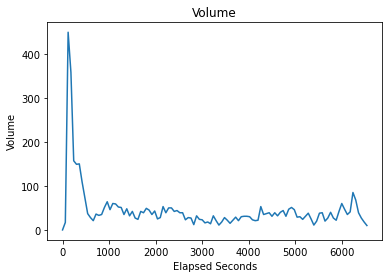

In [34]:

# Plotting Bins Collection

# Plot Graphs?

plot_graphs = "Yes"
# plot_graphs = "No"

# Volume

if plot_graphs == "Yes":
    x = bins_collection["Bin_start"]
    y = bins_collection["Volume"]

    plt.figure()
    plt.title("Volume")
    plt.plot(x,y)
    plt.xlabel("Elapsed Seconds")
    plt.ylabel("Volume")


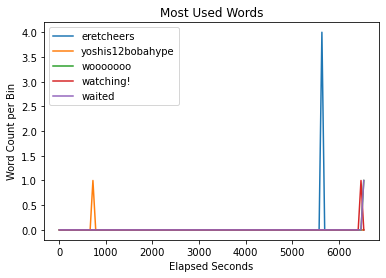

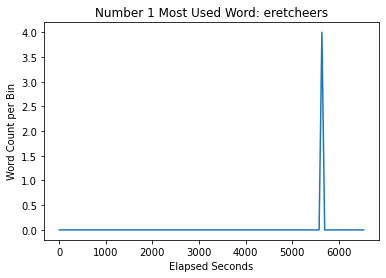

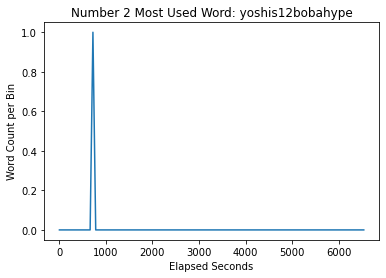

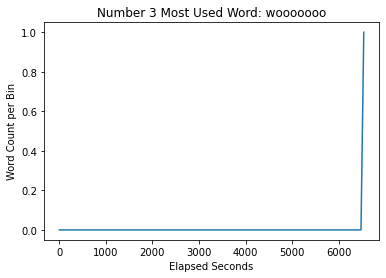

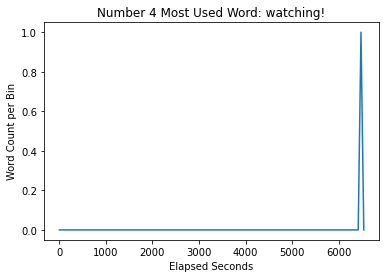

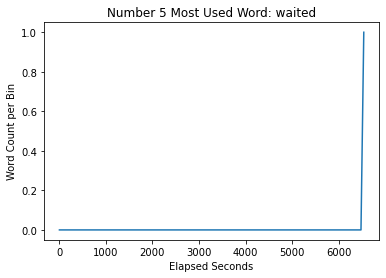

In [35]:

# Top 5 Most Used Words

# Plot Graphs?

plot_graphs = "Yes"
# plot_graphs = "No"

if plot_graphs == "Yes":

    #     all together

    plt.figure()

    x = bins_collection["Bin_start"]
    y = []
    for i in range(0,len(top5words)):
        for j in range(0,len(x)):
            y.append(bins_collection["Word_Count"][j][top5words[i]])

        plt.title("Most Used Words")
        plt.plot(x,y)

        y = []
    plt.legend(top5words)
    plt.xlabel("Elapsed Seconds")
    plt.ylabel("Word Count per Bin")

    #     separately

    x = bins_collection["Bin_start"]
    y = []
    for i in range(0,len(top5words)):
        for j in range(0,len(x)):
            y.append(bins_collection["Word_Count"][j][top5words[i]])

        plt.figure()
        plt.title("Number " + str(i+1) + " Most Used Word: " + top5words[i])
        plt.plot(x,y)
        plt.xlabel("Elapsed Seconds")
        plt.ylabel("Word Count per Bin")

        y = []
    



In [36]:

# Top 5 Most Used Emoticons

# Plot Graphs?

# plot_graphs = "Yes"
plot_graphs = "No"

if plot_graphs == "Yes":

    #     all together

    plt.figure()

    x = bins_collection["Bin_start"]
    y = []
    for i in range(0,len(top5emoticons)):
        for j in range(0,len(x)):
            y.append(bins_collection["Emoticon_Count"][j][top5emoticons[i]])

        plt.title("Most Used Emoticons")
        plt.plot(x,y)

        y = []
    plt.legend(top5emoticons)
    plt.xlabel("Elapsed Seconds")
    plt.ylabel("Emoticon Count per Bin")

    #     separately

    x = bins_collection["Bin_start"]
    y = []
    for i in range(0,len(top5emoticons)):
        for j in range(0,len(x)):
            y.append(bins_collection["Emoticon_Count"][j][top5emoticons[i]])

        plt.figure()
        plt.title("Number " + str(i+1) + " Most Used Emoticon: " + top5emoticons[i])
        plt.plot(x,y)
        plt.xlabel("Elapsed Seconds")
        plt.ylabel("Emoticon Count per Bin")

        y = []



In [37]:


# Plotting Counts Collection

# Plot Graphs?

# plot_graphs = "Yes"
plot_graphs = "No"

# User Activity

if plot_graphs == "Yes":

    #     all together

    plt.figure()

    x = counts_collection["Bin_start"]
    y = []
    for i in range(0,len(top5users)):
        for j in range(0,len(x)):
            y.append(counts_collection["User_Activity"][j][top5users[i]])

        plt.title("Most Active Users")
        plt.plot(x,y)

        y = []
    plt.legend(top5users)
    plt.xlabel("Elapsed Seconds")
    plt.ylabel("Cumulative User Activity")

    #     separately

    x = counts_collection["Bin_start"]
    y = []
    for i in range(0,len(top5users)):
        for j in range(0,len(x)):
            y.append(counts_collection["User_Activity"][j][top5users[i]])

        plt.figure()
        plt.title("Number " + str(i+1) + " Most Active User: " + top5users[i])
        plt.plot(x,y)
        plt.xlabel("Elapsed Seconds")
        plt.ylabel("Cumulative User Activity")

        y = []



In [38]:

# Cumulative Word Counts

# Plot Graphs?

# plot_graphs = "Yes"
plot_graphs = "No"

if plot_graphs == "Yes":

    #     all together

    plt.figure()

    x = counts_collection["Bin_start"]
    y = []
    for i in range(0,len(top5words)):
        for j in range(0,len(x)):
            y.append(counts_collection["Cumulative_Word_Count"][j][top5words[i]])

        plt.title("Most Used Words")
        plt.plot(x,y)

        y = []
    plt.legend(top5words)
    plt.xlabel("Elapsed Seconds")
    plt.ylabel("Cumulative Word Count")

    #     separately

    x = counts_collection["Bin_start"]
    y = []
    for i in range(0,len(top5words)):
        for j in range(0,len(x)):
            y.append(counts_collection["Cumulative_Word_Count"][j][top5words[i]])

        plt.figure()
        plt.title("Number " + str(i+1) + " Most Used Word: " + top5words[i])
        plt.plot(x,y)
        plt.xlabel("Elapsed Seconds")
        plt.ylabel("Cumulative Word Count")

        y = []


In [39]:

# Cumulative Emoticon Counts

# Plot Graphs?

# plot_graphs = "Yes"
plot_graphs = "No"

if plot_graphs == "Yes":

    #     all together

    plt.figure()

    x = counts_collection["Bin_start"]
    y = []
    for i in range(0,len(top5emoticons)):
        for j in range(0,len(x)):
            y.append(counts_collection["Cumulative_Emoticon_Count"][j][top5emoticons[i]])

        plt.title("Most Used Emoticons")
        plt.plot(x,y)

        y = []
    plt.legend(top5emoticons)
    plt.xlabel("Elapsed Seconds")
    plt.ylabel("Cumulative Emoticon Count")

    #     separately

    x = counts_collection["Bin_start"]
    y = []
    for i in range(0,len(top5emoticons)):
        for j in range(0,len(x)):
            y.append(counts_collection["Cumulative_Emoticon_Count"][j][top5emoticons[i]])

        plt.figure()
        plt.title("Number " + str(i+1) + " Most Used Emoticon: " + top5emoticons[i])
        plt.plot(x,y)
        plt.xlabel("Elapsed Seconds")
        plt.ylabel("Cumulative Emoticon Count")

        y = []


In [40]:
# CAN DELETE

#convert timestamp to datetime
# timestamp = df.created_at[0]
# timestamp_datetime = datetime.datetime.strptime(timestamp,"%Y-%m-%dT%H:%M:%S.%fZ")
# df['Timestamp'] = df.created_at.apply(lambda x: dateutil.parser.parse(x))
# #create bins
# df['Bin'] = df.content_offset_seconds.apply(lambda x: math.floor(x/10))


In [41]:
# CAN DELETE

#format output dataframe
# output = pd.DataFrame()
# output['Vod_id'] = df['vod_id']
# output['Timestamp'] = df['Timestamp']
# output['Content_offset_seconds'] = df['content_offset_seconds']
# output['Bin'] = df['Bin']
# output['Username'] = df['user_name']
# output['User_id'] = df['user_id']
# output['Message'] = df['body']
# output['Emoticons'] = df['emoticons']


In [42]:
# DO NOT DELETE

#output_csv = output.to_csv('test.csv')

# bins_path = str(Vod_id) + '_bins_collection.json'
# bins_json = bins_collection.to_json(bins_path, orient='records')

# counts_path = str(Vod_id) + '_counts_collection.json'
# counts_json = counts_collection.to_json(counts_path, orient='records')
